# Introduction to neural networks

# 1. What are neural networks?

- Neural networks (NNs) are a subset of machine learning (ML) algorithms, inspired by the structure of biological neural networks.

- Deep learning (DL) is a specific case of using deep NNs, that is NNs with a more complex layered architecture.


# 2. Perceptron

A perceptron is the earliest form of a neural network unit, introduced by Frank Rosenblatt in 1958. It is a binary classifier that makes predictions based on a linear combination of input features. The perceptron algorithm was one of the first algorithms used to implement a simple neural network. Mathematically:


$$f(\sum_{i=1}^{n} \omega_i x_i + b) = y$$

- $x_i$ - input feature
- $\omega_i$ - weight
- $b$ - bias
- $f$ - step function
- $y$ - binary output



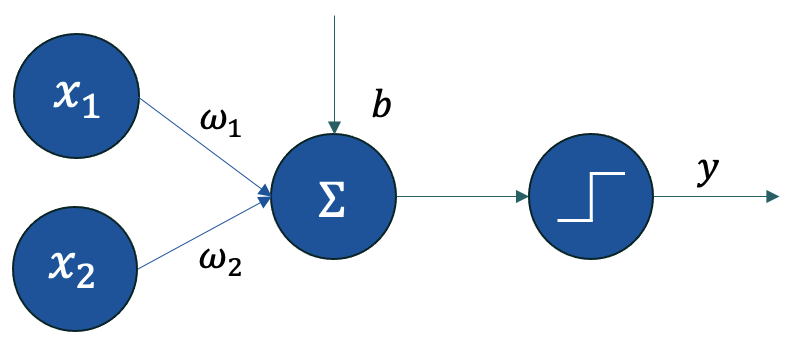

The perceptron uses a Heaviside step function to determine whether the weighted sum of inputs plus the bias is above or below a certain threshold:


\begin{align}
        \text{$y$} = \left\{
        \begin{array}{cl}
        1 \text{  if} & \sum_{i=1}^{n} \omega_i x_i + b \ge 0 \\
        0 \text{  if} & \sum_{i=1}^{n} \omega_i x_i + b < 0
        \end{array}
        \right.
    \end{align}

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()
        self.lr = learning_rate

    def activation(self, x):
        # Step function
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for i in range(len(X)):
                x_i = X[i]
                y_pred = self.predict(x_i)
                error = y[i] - y_pred
                # Update rule
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error
            acc = np.mean(self.predict(X) == y)
            print(f"Epoch {epoch+1}, Accuracy: {acc:.2f}")

In [ ]:
# Simple AND gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 0, 0, 1])  # AND logic

p = Perceptron(input_dim=2)
p.train(X, y, epochs=10)

# Predictions
print("Predictions:", p.predict(X))


Epoch 1, Accuracy: 0.25
Epoch 2, Accuracy: 0.25
Epoch 3, Accuracy: 0.25
Epoch 4, Accuracy: 0.25
Epoch 5, Accuracy: 0.25
Epoch 6, Accuracy: 0.25
Epoch 7, Accuracy: 0.25
Epoch 8, Accuracy: 0.25
Epoch 9, Accuracy: 0.25
Epoch 10, Accuracy: 0.25
Predictions: [1 1 1 1]


The perceptron can only solve problems that are linearly separable (i.e., it can only classify data that can be separated by a straight line or hyperplane). It cannot solve more complex problems like XOR.

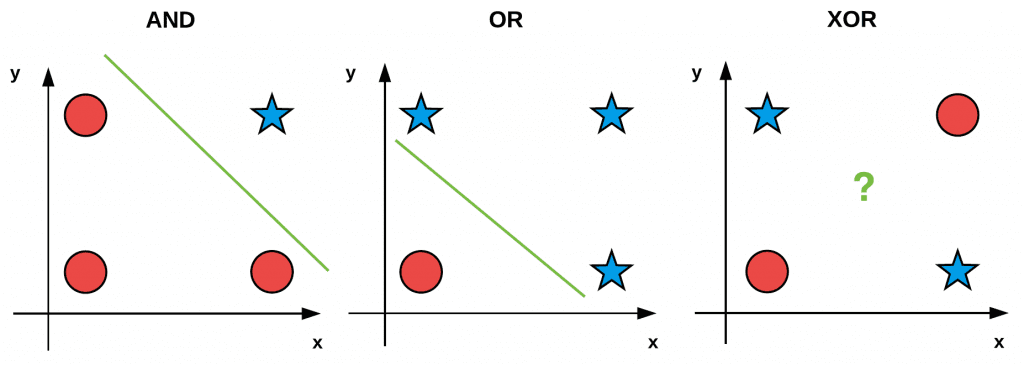

# 3. Neural networks: architecture and basic concepts

**3.1 Neurons**

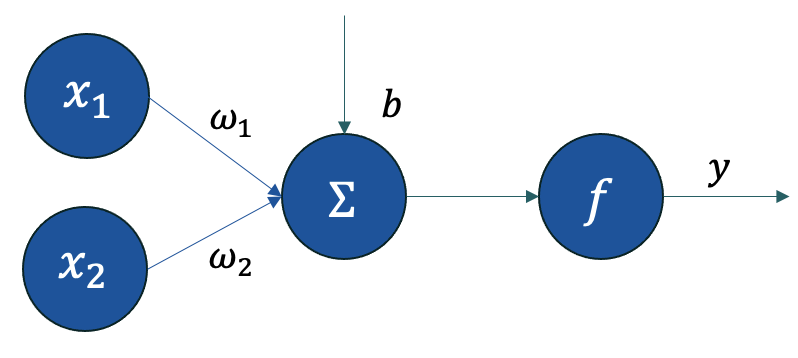

A neuron, or artificial neuron, is a more generalized version of the perceptron and is the building block of neural networks. It receives input from the other nodes, or from an external source, and computes an output. Mathematical representation is similar to the one of a perceptron:

$$f(\sum_{i=1}^{n} \omega_i x_i + b) = y$$

- $x_i$ - input feature
- $\omega_i$ - weights
- $b$ - bias
- $f$ - activation function (can be tanh, Sigmoid, ReLu, etc)
- $y$ - continious or non-linear output

**3.2 Layers**

A layer is a collection of neurons that processes input data in a specific way and passes it to the next layer. Number of layers and their type define the architecture of a neural network.

Input layer:

- Receives raw data and feeds it into the network
- Number of neurons = number of input features (e.g., pixels in an image, sensor readings)
- No activation function (just passes data forward)


Hidden layers:
- Perform computations and feature extraction
- Each neuron applies weights, biases, and activation functions
- More hidden layers = deeper network (deep learning)
- Common activation functions: ReLU, Sigmoid, Tanh

Output layer:

- Gives the final prediction or classification
- Common activation functions: linear, sigmoid, softmax


Layer classification:

- Fully connected (linear / dense)
- Reccurent
- Convolutional
- Transformer

3.2.1 Fully connected layer

A fully connected layer is a type of layer where every input neuron is connected to every output neuron. As a result, all possible  layer-to-layer connections are present - it captures global relationships between features

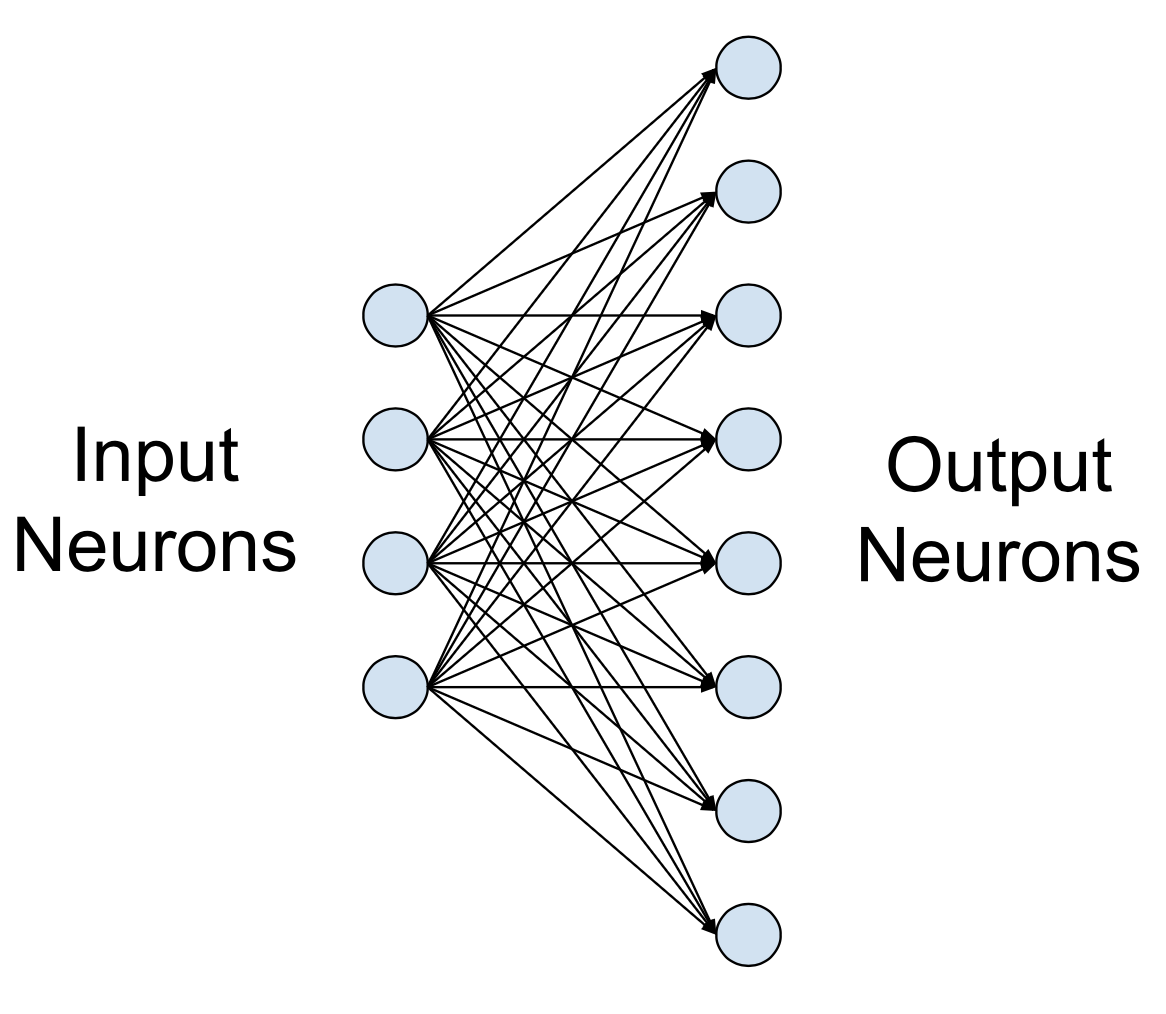

3.2.2 Multi-Layer Perceptron (MLP)

- MLP consists of a directed acyclic graph (feed-forward), with an input layer, several hidden layers, and an output layer
- Its layers are fully connected
- The more hidden layers MLP has, the deeper it gets

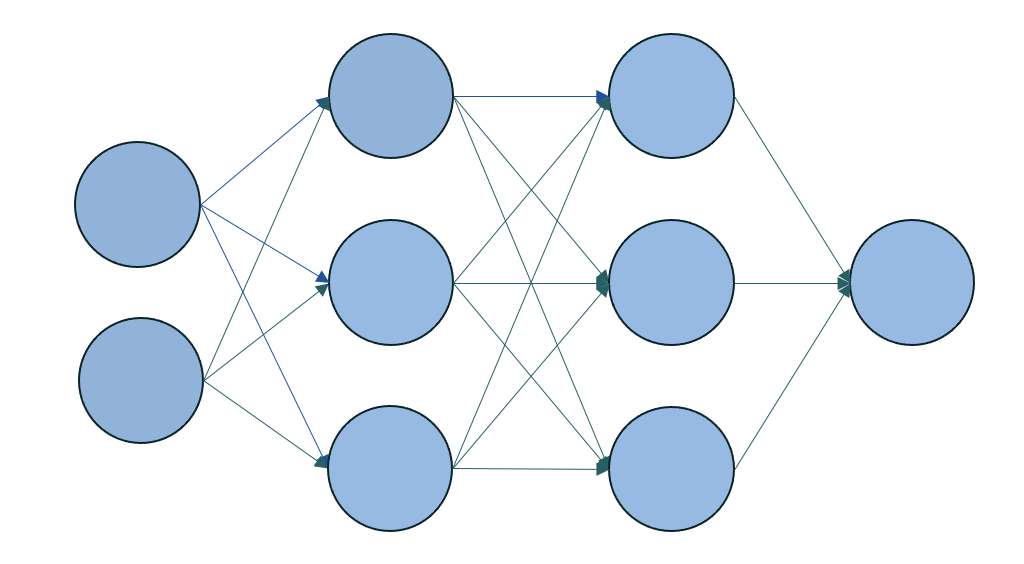

3.2.3 Reccurent layer

A recurrent layer is designed to process sequential or time-series data, where the output at each time step depends not only on the current input but also on previous outputs (memory).

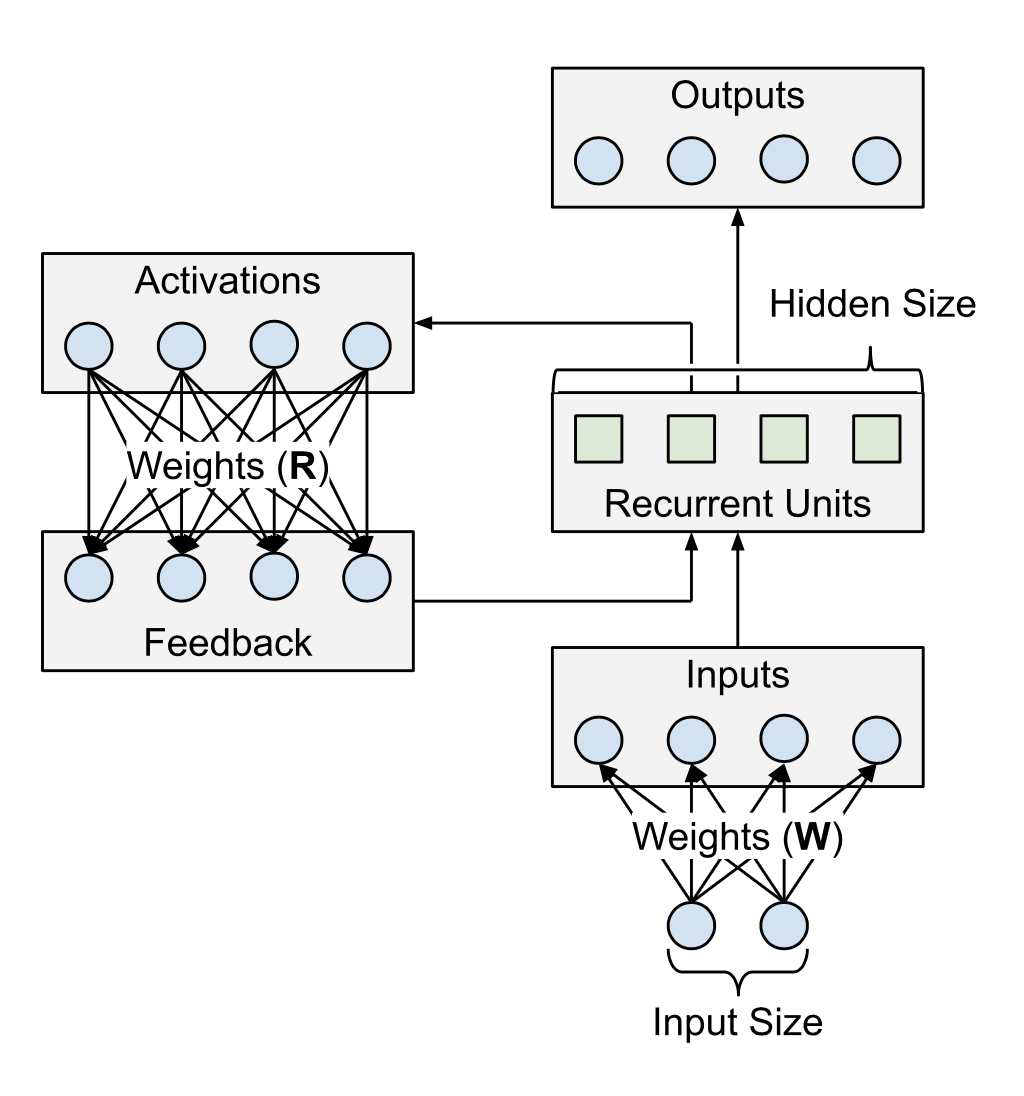

3.2.4 Recurrent Neural Network (RNN)

RNNs are a class of artificial neural networks designed for processing sequential data, where the order of elements is important.

Applications:
- Time series forecasting
- Natural language processing
- Medical diagnostics
- Autonomous vehicles


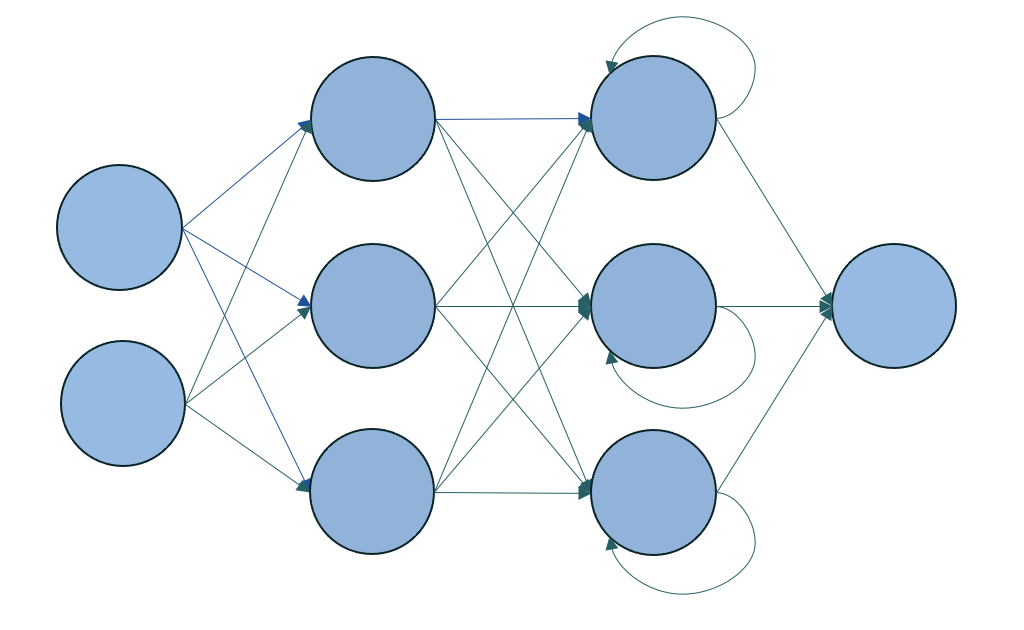

**3.3 Activation functions**

An activation function is a mathematical function applied to the output of a neuron. It introduces non-linearity into the model, allowing the network to learn and represent complex patterns in the data. Without this non-linearity feature, a neural network would behave like a linear regression model, no matter how many layers it has.

Important mathematical properties:
*   Non-linearity
*   Range: if finite, gradient-based training methods tend to be more stable
*   Continuously differentiable: desirable for enabling gradient-based optimization methods





3.3.1 ReLU

\begin{align}
        \text{ReLU}(x) = \left\{
        \begin{array}{cl}
        x & x > 0 \\
        0 & x \le 0.
        \end{array}
        \right.
    \end{align}

Properties of ReLU:
- Efficient
- Scale-invariant
- Non-differentiability at zero
- Unbounded: range [0, $∞$)
- Vanishing gradients for negative values

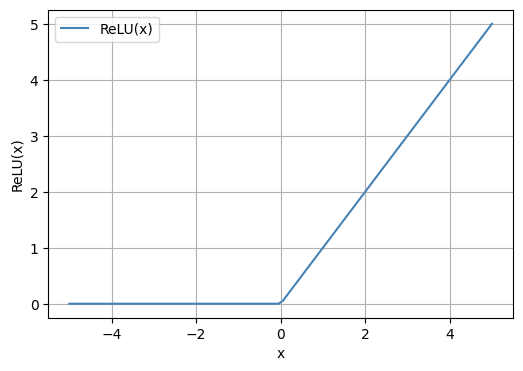

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU function
def relu(x):
  if x > 0:
    x = x
  else:
    x = 0
  return x

# Generate input values
x = np.linspace(-5, 5, 100)
y = []
# Compute ReLU values
for elem in x:
  y.append(relu(elem))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="ReLU(x)", color="steelblue")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.legend()
plt.grid(True)
plt.show()

3.3.2 Hyperbolic tangent



$$tanh(x) = \frac{{e}^{x} - {e}^{-x}}{{e}^{x} + {e}^{-x}}$$


Properties of the Hyperbolic Tangent:
- bounded in [−1, 1]
- skew-symmetric
- strictly increasing
- has a “squashing” effect (vanishing gradients)

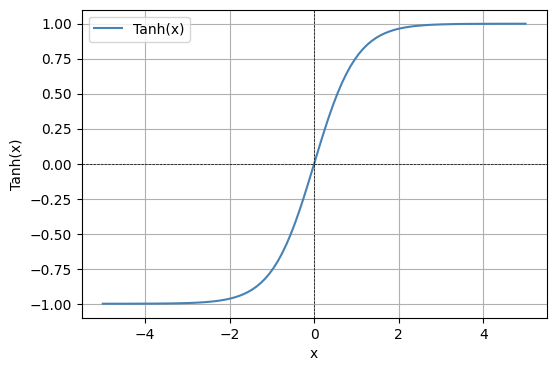

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define Tanh function
def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-5, 5, 100)

# Compute Tanh values
y = tanh(x)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="Tanh(x)", color="steelblue")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Training

Training algorithm:
1. Initilization of weights and biases
2. Forward propagation
3. Loss calculation
4. Backpropagation
5. Optimization

Then repeat

3.0 Data preparation and defining the architecture  

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(-2, 2, 100).reshape(-1, 1)  # Features
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 0.5, size=(100, 1))  # Quadratic function with noise

# Defining the architecture
input_size = 1
hidden_size = 10
output_size = 1

3.1 Initilization of weights and biases

In [ ]:
W1 = np.random.randn(input_size, hidden_size)  # Weights for input → hidden
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer

W2 = np.random.randn(hidden_size, output_size)  # Weights for hidden → output
b2 = np.zeros((1, output_size))  # Bias for output layer

3.2 Forward propagation

Forward propagation is a process of getting the NN output based on a given input. Given its inputs from the input layer, each neuron in the first hidden layer computes the transformation $$z = W*x + b$$  and then applies an activation function on the transformation. After that the transformation is forwarded to the next layer, the process repeats until the data reaches the output layer.

In [ ]:
Z1 = X @ W1 + b1  # Linear transformation (input → hidden)
A1 = np.tanh(Z1)  # Activation function (Tanh)
Z2 = A1 @ W2 + b2  # Linear transformation (hidden → output)
y_pred = Z2  # No activation in output layer (Regression)

3.3 Loss calculation

After forward propagation, the network evaluates its performance using a loss function, which measures the difference between the actual output and the predicted output. The loss function could vary: common choices are mean squared error for regression tasks or cross-entropy loss for classification.

In [ ]:
loss = np.mean((y_pred - y) ** 2)

**3.4 Backpropagation (Gradient Calculation)**

 The goal of training is to minimize the loss. This is where backpropagation comes into play. The network computes the gradients of the loss function with respect to each weight and bias in the network. This involves applying the chain rule of calculus to find out how much each part of the output error can be attributed to each weight and bias.

Chain rule for output layer → hidden layer:
$$\frac{\partial L}{\partial \omega_2} = \frac{\partial z_2}{\partial \omega_2} \cdot \frac{\partial \hat{y}}{\partial z_2}\cdot \frac{\partial L}{\partial \hat{y}}$$

$$\frac{\partial L}{\partial b_2} = \sum(\frac{\partial z_2}{\partial b_2} \cdot \frac{\partial \hat{y}}{\partial z_2}\cdot \frac{\partial L}{\partial \hat{y}})$$

1. Gradient of loss w.r.t predictions:
$$\frac{\partial L}{\partial \hat{y}} = \frac{2}{N} (\hat{y} - y)$$

2. Gradient of predictions w.r.t. output layer:
$$\frac{\partial \hat{y}}{\partial z_2} = 1$$

3. Gradient of output layer w.r.t. output weights:
$$\frac{\partial z_2}{\partial \omega_2} = A_1^T$$

4. Gradient of output layer w.r.t output bias:

$$\frac{\partial z_2}{\partial b_2} = 1$$

Chain rule for hidden layer → input layer:
$$\frac{\partial L}{\partial \omega_1} = \frac{\partial z_1}{\partial \omega_1} \cdot \frac{\partial a_1}{\partial z_1}\cdot \frac{\partial L}{\partial a_1}$$

$$\frac{\partial L}{\partial b_1} = \sum(\frac{\partial z_1}{\partial b_1} \cdot \frac{\partial a_1}{\partial z_1}\cdot \frac{\partial L}{\partial a_1})$$

1. Gradient of loss w.r.t. hidden layer activation:
$$\frac{\partial L}{\partial a_1} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial a_1} = \frac{\partial L}{\partial \hat{y}} \cdot \omega_2^T$$

2. Gradient of hidden layer activation w.r.t. hidden layer pre-activation:
$$\frac{\partial a_1}{\partial z_1} = \frac{d}{d z_1} \tanh(z_1) = 1 - \tanh^2(z_1)$$

3. Gradient of hidden layer pre-activation w.r.t. input weights:
$$\frac{\partial z_1}{\partial \omega_1} = x^T$$

4. Gradient of hidden layer pre-activation w.r.t hidden bias:

$$\frac{\partial z_1}{\partial b_1} = 1$$

In [ ]:
# Derivative of tanh
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Backpropagation
dL_dy = 2 * (y_pred - y) / len(y)  # Gradient of loss for y_pred
dL_dW2 = A1.T @ dL_dy  # Gradient for W2
dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)  # Gradient for b2

dL_dA1 = dL_dy @ W2.T  # Gradient for A1
dL_dW1 = X.T @ (dL_dA1 * tanh_derivative(Z1))  # Gradient w.r.t. W1
dL_db1 = np.sum(dL_dA1 * tanh_derivative(Z1), axis=0, keepdims=True)  # Gradient for b1

Gradients represent the rate of change of the loss function with respect to each weight and bias. They tell us how much and in which direction to adjust the parameters to minimize the error.

- A large gradient → big update to weights
- A small gradient → small update
- A zero gradient → no change (network has converged or is stuck)


**3.5 Optimization (Weight Update)**

Once the gradients are calculated, the weights and biases are updated using an optimization algorithm like gradient descent. The key idea is to move weights in the opposite direction of the gradient to decrease the loss:

$$\omega_j \leftarrow \omega_i - \alpha \cdot \frac{\partial L}{\partial \omega_i}$$

$$b_j \leftarrow b_i - \alpha \cdot \frac{\partial L}{\partial b_i}$$

The size of the step taken in each update is determined by the learning rate.

In [ ]:
# Update weights and biases
learning_rate = 0.1

W1 -= learning_rate * dL_dW1
b1 -= learning_rate * dL_db1
W2 -= learning_rate * dL_dW2
b2 -= learning_rate * dL_db2

Stochastic gradient desscent

Stochastic Gradient Descent (SGD) is an optimization algorithm that updates a model's parameters using the gradient computed from a single randomly chosen data point at each step. This makes training faster and more memory-efficient than standard Gradient Descent, and the randomness helps escape poor local minima, though it introduces more noise into the training process.

SGD algorithm:
- Randomly selects a single datum $x_i$ from the training set to estimate the gradient at each iteration
- Starts with computing the gradients of a loss function
- Recursively updates the parameters
- Recursion stops whether the prescribed number of iterations is reached or the error is smaller than the set threshold.

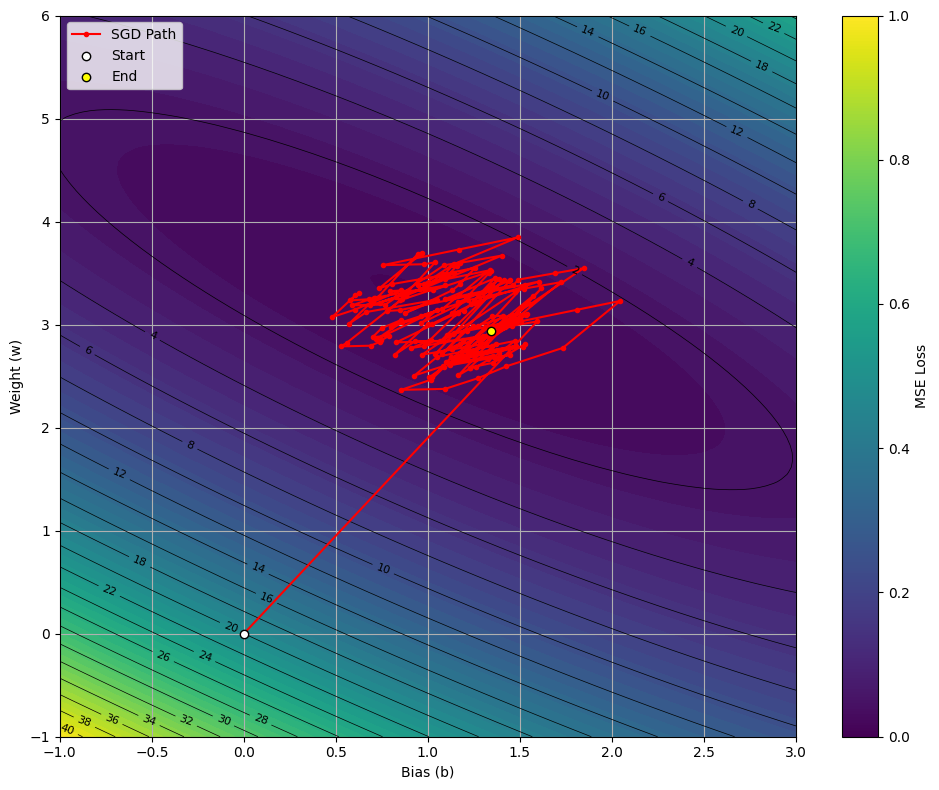

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(20, 1)
true_w, true_b = 3.5, 1.0
y = true_w * X + true_b + np.random.randn(20, 1) * 1.0

# Add bias term
X_b = np.c_[np.ones((20, 1)), X]

# MSE loss
def compute_mse(theta):
    preds = X_b.dot(theta)
    return np.mean((preds - y) ** 2)

# Stochastic gradient for a single example
def compute_sgd_gradient(theta, x_i, y_i):
    pred = x_i.dot(theta)
    error = pred - y_i
    return 2 * x_i.T * error

theta = np.array([[0.0], [0.0]])  # bias b, weight w
learning_rate = 0.1
n_epochs = 10
path = [theta.copy()]

# SGD loop and parameter update
for epoch in range(n_epochs):
    for i in range(X_b.shape[0]):
        rand_i = np.random.randint(X_b.shape[0])
        x_i = X_b[rand_i:rand_i + 1]
        y_i = y[rand_i:rand_i + 1]
        gradient = compute_sgd_gradient(theta, x_i, y_i)
        theta -= learning_rate * gradient
        path.append(theta.copy())

path = np.array(path).squeeze()

# Generate loss surface
b_vals = np.linspace(-1, 3, 100)
w_vals = np.linspace(-1, 6, 100)
B, W = np.meshgrid(b_vals, w_vals)
Z = np.array([
    compute_mse(np.array([[b], [w]]))
    for b, w in zip(B.ravel(), W.ravel())
]).reshape(B.shape)

# Plotting
plt.figure(figsize=(10, 8))
contour = plt.contourf(B, W, Z, levels=50, cmap='viridis')
lines = plt.contour(B, W, Z, levels=20, colors='black', linewidths=0.5)
plt.clabel(lines, inline=True, fontsize=8)

# Plot SGD path
plt.plot(path[:, 0], path[:, 1], "r.-", label="SGD Path")
plt.scatter(path[0, 0], path[0, 1], color='white', edgecolor='black', zorder=5, label="Start")
plt.scatter(path[-1, 0], path[-1, 1], color='yellow', edgecolor='black', zorder=5, label="End")

plt.xlabel("Bias (b)")
plt.ylabel("Weight (w)")
plt.colorbar(label="MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Pros:
- Efficiency
- Ability to process large datasets
- Robustness to noise
- Can be used with any type of loss function

Cons:
- Sensitive to hyperparameters
- Can be slow to converge for large datasets
- Sensitive to feature scaling
- Prone to converge to local optima and may get trapped in saddle points in certain cases
- Difficult to choose a suitable learning rate: a too low learning rate leads to slow convergence, while a too high learning rate causes excessive fluctuation during convergence
- All parameters use the same learning rate

Adam (Adaptive Moment Estimation)

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

 - Momentum: Adam keeps track of an exponentially decaying average of past gradients (similar to momentum in SGD). This helps to smooth out the updates and navigate noisy gradients.

- Adaptive Learning Rates: Adam also computes an exponentially decaying average of past squared gradients. This is used to scale the learning rate for each parameter, allowing for larger updates for infrequent features and smaller updates for frequent ones.

- Bias Correction: In the initial iterations, the averages computed by Adam may be biased towards zero. Adam incorporates a bias correction step to counteract this early bias.


Strengths:
- Straightforward to implement
- Computationally efficient
- Little memory requirements
- Invariant to diagonal rescaling of the gradients
- Well suited for problems that are large in terms of data and/or parameters
- Appropriate for non-stationary objectives
- Appropriate for problems with very noisy/or sparse gradients
- Hyperparameters have an intuitive interpretation and typically require little tuning

**3.6 How many iterations needed?**

An epoch is one complete pass through the entire dataset during training.

Too few epochs → Model underfits (does not learn enough).
Too many epochs → Model overfits (memorizes training data, poor generalization).
Use early stopping to stop training when validation loss stops improving.

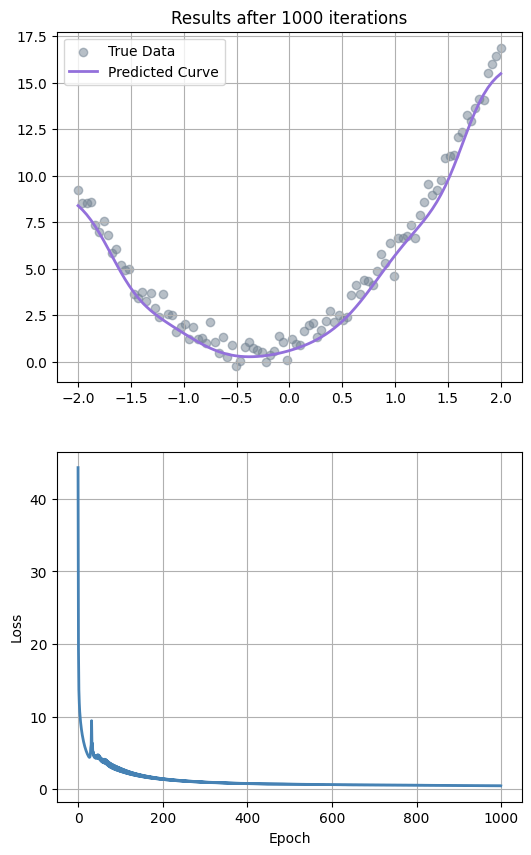

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

# Derivative of tanh
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Generate dataset (Quadratic function with noise)
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)  # Features
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 0.5, size=(100, 1))  # Quadratic function with noise

# Initialize weights and biases
input_size = 1
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)  # Weights for input → hidden
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer

W2 = np.random.randn(hidden_size, output_size)  # Weights for hidden → output
b2 = np.zeros((1, output_size))  # Bias for output layer

learning_rate = 0.1
losses = []
n_epochs = 1000

for epoch in range(n_epochs):
  Z1 = X @ W1 + b1  # Linear transformation (input → hidden)
  A1 = tanh(Z1)  # Activation function (Tanh)
  Z2 = A1 @ W2 + b2  # Linear transformation (hidden → output)
  y_pred = Z2  # No activation in output layer (Regression)

    # Compute loss (MSE)
  loss = np.mean((y_pred - y) ** 2)

    # Backpropagation
  dL_dy = 2 * (y_pred - y) / len(y)  # Gradient of loss w.r.t. y_pred
  dL_dW2 = A1.T @ dL_dy  # Gradient w.r.t. W2
  dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)  # Gradient w.r.t. b2

  dL_dA1 = dL_dy @ W2.T  # Gradient w.r.t. A1
  dL_dW1 = X.T @ (dL_dA1 * tanh_derivative(Z1)) # Gradient w.r.t. W1
  dL_db1 = np.sum(dL_dA1 * tanh_derivative(Z1), axis=0, keepdims=True)  # Gradient w.r.t. b1

  W1 -= learning_rate * dL_dW1
  b1 -= learning_rate * dL_db1
  W2 -= learning_rate * dL_dW2
  b2 -= learning_rate * dL_db2

  losses.append(loss)


fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Plot results
axes[0].scatter(X, y, label="True Data", color="slategrey", alpha=0.5)
axes[0].plot(X, y_pred, label="Predicted Curve", color="mediumpurple", linewidth=2)
axes[0].legend()
axes[0].grid(True)
axes[0].set_title(f'Results after {n_epochs} iterations')

axes[1].plot(np.arange(n_epochs), losses, color='steelblue', linewidth=2)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
plt.show()

#4. Neural Networks with Pytorch

4.1 Automatic differentiation and Autograd

At its core, Autograd is PyTorch’s automatic differentiation engine, designed to handle the computation of gradients required for optimizing machine learning models. Autograd makes this process effortless by automating the differentiation of functions that involve PyTorch tensors.

In [ ]:
# comparison between gradients acquired from manually implemented backpropagation
# and gradients acquired with the help of torch.autograd

import torch
import numpy as np


# numpy implementation
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 0.5, size=(100, 1))

input_size = 1
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


Z1 = X @ W1 + b1
A1 = tanh(Z1)
Z2 = A1 @ W2 + b2
y_pred = Z2

loss = np.mean((y_pred - y) ** 2)

dL_dy =  2 * (y_pred - y) / len(y)
dL_dW2 = A1.T @ dL_dy
dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)

dL_dA1 = dL_dy @ W2.T
dL_dW1 = X.T @ (dL_dA1 * tanh_derivative(Z1))
dL_db1 = np.sum(dL_dA1 * tanh_derivative(Z1), axis=0, keepdims=True)

# Gradients
print("Gradients (numpy):")
print(f"dL/dW1: {dL_dW1}")
print(f"dL/db1: {dL_db1}")
print(f"dL/dW2: {dL_dW2}")
print(f"dL/db2: {dL_db2}")

# pytorch implementation
X_torch = torch.from_numpy(X).float()
y_torch = torch.from_numpy(y).float()

W1_torch = torch.from_numpy(W1).float()
W1_torch.requires_grad = True

b1_torch = torch.from_numpy(b1).float()
b1_torch.requires_grad = True

W2_torch = torch.from_numpy(W2).float()
W2_torch.requires_grad = True

b2_torch = torch.from_numpy(b2).float()
b2_torch.requires_grad = True

z1 = torch.matmul(X_torch, W1_torch) + b1_torch  # Input to hidden layer
h = torch.tanh(z1)  # Activation function
z2 = torch.matmul(h, W2_torch) + b2_torch  # Hidden to output layer
y_pred_torch = z2  # Output (no activation)

# Loss
loss = torch.mean((y_pred_torch - y_torch) ** 2)  # MSE Loss

# Backward pass
loss.backward()

# Gradients
print("Gradients (autograd):")
print(f"dL/dW1: {W1_torch.grad}")
print(f"dL/db1: {b1_torch.grad}")
print(f"dL/dW2: {W2_torch.grad}")
print(f"dL/db2: {b2_torch.grad}")

# We can observe that the computed gradients are identical.

Gradients (numpy):
dL/dW1: [[ 0.93194246  0.09623944 -0.24700574 -4.22315891  0.96889322 -1.1249081
   0.00741088  5.82434013 -5.24203024 -3.97948723]]
dL/db1: [[ 2.75474399  0.18774652 -0.47538974 -9.1854101   1.82687535 -2.18765708
   0.02943826 10.99286246 -9.97334731 -7.4694597 ]]
dL/dW2: [[ 3.56240163]
 [ 1.98326435]
 [ 1.68198557]
 [ 2.97177957]
 [ 0.84730756]
 [-1.92219513]
 [-3.71640091]
 [-0.91390832]
 [-1.31165714]
 [ 0.39759271]]
dL/db2: [[-10.05776964]]
Gradients (autograd):
dL/dW1: tensor([[ 0.9319,  0.0962, -0.2470, -4.2232,  0.9689, -1.1249,  0.0074,  5.8243,
         -5.2420, -3.9795]])
dL/db1: tensor([[ 2.7547,  0.1877, -0.4754, -9.1854,  1.8269, -2.1877,  0.0294, 10.9929,
         -9.9733, -7.4695]])
dL/dW2: tensor([[ 3.5624],
        [ 1.9833],
        [ 1.6820],
        [ 2.9718],
        [ 0.8473],
        [-1.9222],
        [-3.7164],
        [-0.9139],
        [-1.3117],
        [ 0.3976]])
dL/db2: tensor([[-10.0578]])


4.2 NN implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

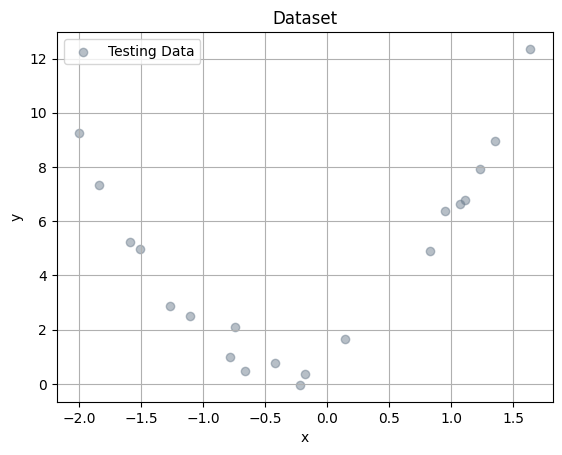

In [ ]:
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)  # Features
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 0.5, size=(100, 1))  # Quadratic function with noise

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Plotting
plt.scatter(X_test, y_test, label="Testing Data", color="slategrey", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset")
plt.legend()
plt.grid()
plt.show()

In PyTorch, nn.Module is the base class for all neural networks. When defining a neural network, we inherit from nn.Module to get useful functionalities like parameter management, easy forward passes, loss criteria, backpropagation, model saving/loading and etc.

In [ ]:
class OurFirstNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_layer1 = nn.Linear(1, 5) # 1 input feature -> 5 neurons
        self.hidden_layer2 = nn.Linear(5, 4) # 5 neurons -> 4 neurons
        self.output = nn.Linear(4, 1) # 4 neurons -> 1 output feature

    def forward(self, x):
        x = torch.tanh(self.hidden_layer1(x))  # Apply TanH activation function
        x = torch.tanh(self.hidden_layer2(x))  # Apply TanH activation function
        x = self.output(x)  # Output layer (no activation)
        return x

During initialization of the model the 1st training step is completed - all the weights and biases are assigned automatically. As we can see, after rerunning this code block, values are initialized randomly, it's built-in in torch.nn

In [ ]:
model = OurFirstNN()

for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data, '\n')

hidden_layer1.weight tensor([[ 0.7958],
        [ 0.9823],
        [ 0.1844],
        [ 0.7747],
        [-0.6640]]) 

hidden_layer1.bias tensor([ 0.6227,  0.8678,  0.7110, -0.5078,  0.9664]) 

hidden_layer2.weight tensor([[ 0.3216,  0.0712,  0.1253, -0.0691,  0.0419],
        [-0.0206, -0.4407,  0.0131, -0.4000, -0.2854],
        [ 0.1218, -0.2753, -0.1550,  0.1269, -0.3207],
        [ 0.3595,  0.2628,  0.3884, -0.2254,  0.1629]]) 

hidden_layer2.bias tensor([ 0.2494, -0.0373,  0.1157,  0.1575]) 

output.weight tensor([[ 0.3489,  0.0166,  0.2043, -0.1534]]) 

output.bias tensor([0.0567]) 



torch.optim package already contain most commonly used methods, so optimization is simple to impliment. To construct an optimizer you have to give it an iterable containing the parameters to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01) #lr stands for learning rate

It’s important to note that PyTorch accumulates gradients in the .grad attribute. Calling method *.backward()* multiple times without resetting the gradients will cause gradient accumulation.

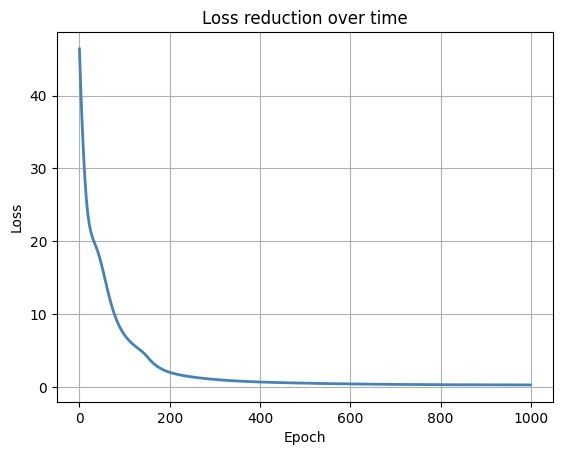

In [ ]:
criterion = nn.MSELoss()

losses = []

for epoch in range(1000):

    optimizer.zero_grad() #resets all gradients for each epoch
    # Step 2: forward propagation through OurFirstNN.forward()
    y_pred = model(x_train)
    # Step 3: loss calculation
    loss = criterion(y_pred, y_train)
    # Step 4: backppropogation
    loss.backward()
    # Step 5:
    optimizer.step()
    losses.append(loss.item())  # Store loss

# Plot loss curve
plt.plot(losses, color='steelblue', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss reduction over time")
plt.grid()
plt.show()


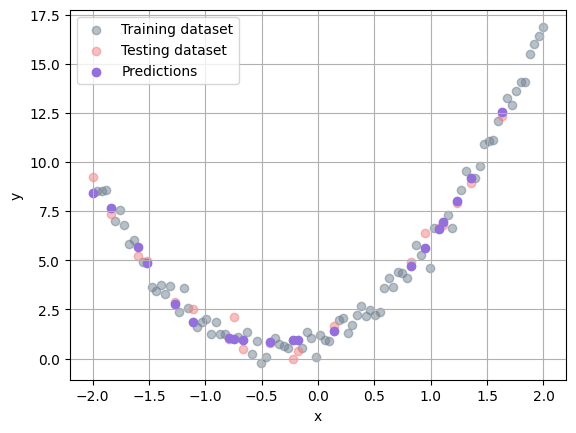

In [ ]:
# Predict on test data
y_pred_test = model(x_test).detach().numpy()

# Plot predictions vs actual data
plt.scatter(x_train, y_train, label="Training dataset", color="slategrey", alpha=0.5)
plt.scatter(x_test, y_test, label="Testing dataset", color="lightcoral", alpha=0.5)
plt.scatter(x_test, y_pred_test, label="Predictions", color="mediumpurple")
plt.xlabel("x")
plt.ylabel("y")
#plt.title("Neural Network Predictions on Test Data")
plt.legend()
plt.grid()
plt.show()


References:
- https://www.3blue1brown.com/lessons/backpropagation-calculus
- https://github.com/alert-geomaterials/2023-doctoral-school/blob/main/chapters/CO7%20-%20FG_ANN-basic.pdf
- https://arxiv.org/abs/1412.6980
- https://www.mdpi.com/2078-2489/15/9/517
- https://www.sciencedirect.com/science/article/abs/pii/S0925231222008426?via%3Dihub
- https://www.cis.upenn.edu/~danroth/Teaching/CS446-17/LectureNotesNew/neuralnet1/main.pdf